In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import os
import sys
sys.path.append(r"C:\Users\ekkol\OneDrive\Escritorio\RepositorioVario\lab_intermedio")
from modulos import carga_datos as cd
import importlib
importlib.reload(cd)



<module 'modulos.carga_datos' from 'C:\\Users\\ekkol\\OneDrive\\Escritorio\\RepositorioVario\\lab_intermedio\\modulos\\carga_datos.py'>

Carga de Datos

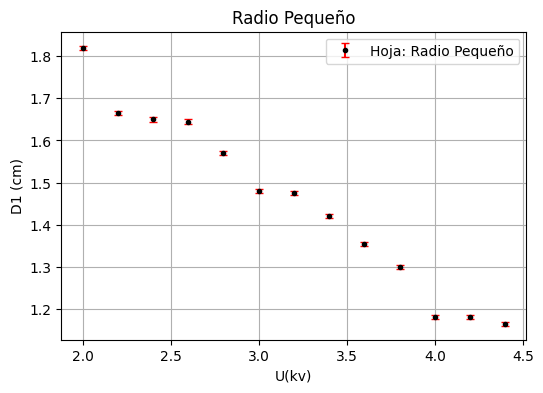

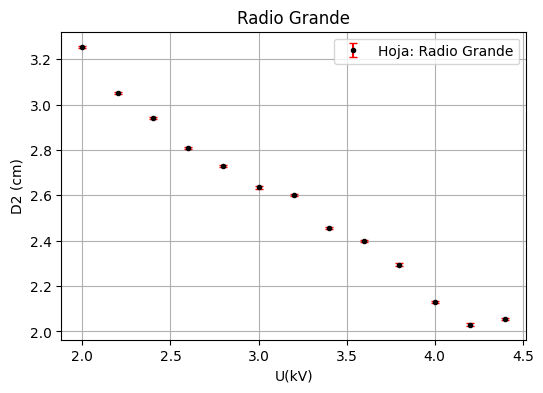

{'Radio Pequeño': {'x': array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4]), 'y': array([1.82 , 1.666, 1.65 , 1.645, 1.57 , 1.48 , 1.475, 1.42 , 1.355,
       1.3  , 1.18 , 1.18 , 1.165]), 'error': array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.005, 0.005, 0.005, 0.005]), 'name': 'Radio Pequeño'}, 'Radio Grande': {'x': array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4]), 'y': array([3.255, 3.05 , 2.94 , 2.81 , 2.73 , 2.635, 2.6  , 2.455, 2.4  ,
       2.295, 2.13 , 2.03 , 2.055]), 'error': array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.005, 0.005, 0.005, 0.005]), 'name': 'Radio Grande'}}


In [ ]:
Data= cd.plot_excel_sheets(r"C:/Users/ekkol/OneDrive/Escritorio/RepositorioVario/lab_intermedio/difraccion_electrones/datos_difraccion_electrones.xlsx", False)
radio_pequeño = Data["Radio Pequeño"]
radio_grande = Data["Radio Grande"]
#print(Data)


Calculamos $\lambda_{\text{broglie}} = \frac{h}{\sqrt{2 e V m_e}}$ para cada valor de voltaje


In [45]:
V = radio_pequeño["x"] * 1000 #Pasamos de kV a V
h = 6.62607015e-34 #Joules*segundos
m_e = 9.10938356e-31 #kg
e = 1.602176634e-19 #Coulombs10

def longitud_de_onda (V_v):
    l_broglie = (h / (np.sqrt(2 * m_e * e * V_v)))
    return l_broglie

def incer_lambda_broglie (V_v):
    incer_V = 0.1
    return h / (2*np.sqrt(2 * m_e * e * V_v**3)) * incer_V

#Devuelve arrays!
l_broglie = longitud_de_onda(V)
l_broglie_incer = incer_lambda_broglie(V)
media_l, sdv_l, sigmas_l  =cd.calcular_sigmas(l_broglie)
print("l broglie: ",l_broglie)
print("Incertidumbres l broglie",l_broglie_incer)
print("sigmas l broglie:", sigmas_l)



print(sigmas_l)


l broglie:  [2.74237185e-11 2.61474897e-11 2.50343154e-11 2.40521922e-11
 2.31772724e-11 2.23913724e-11 2.16803531e-11 2.10330320e-11
 2.04404329e-11 1.98952565e-11 1.93914973e-11 1.89241637e-11
 1.84890672e-11]
Incertidumbres l broglie [6.85592963e-16 5.94261129e-16 5.21548237e-16 4.62542158e-16
 4.13879864e-16 3.73189540e-16 3.38755517e-16 3.09309294e-16
 2.83894902e-16 2.61779690e-16 2.42393717e-16 2.25287663e-16
 2.10103037e-16]
sigmas l broglie: [ 1.91972796  1.4542741   1.04828795  0.69009748  0.37100517  0.08437932
 -0.17493676 -0.41102147 -0.62714846 -0.82597995 -1.00970612 -1.18014754
 -1.33883169]
[ 1.91972796  1.4542741   1.04828795  0.69009748  0.37100517  0.08437932
 -0.17493676 -0.41102147 -0.62714846 -0.82597995 -1.00970612 -1.18014754
 -1.33883169]


Calculamos $\lambda_{\text{bragg}} = \frac{2d_i}{n = 1} \sin \left[ \frac{1}{2} \tan^{-1} \left( \frac{D_i}{2L} \right) \right]$ Donde $d_1$ =  213 pm y $d_2$ = 123 pm; y $D_1$ el diámetro pequeño y $D_2$ el diámetro grande

In [42]:
d_1 = radio_pequeño["y"] #distancia en cm
d_2 = radio_grande["y"] #distancia en cm

#Distancias interplanares:

D1 = 213 #pm
D2 = 123 #pm

D_1_m = D1 * 1e-12 #distancia en m
D_2_m = D2 * 1e-12 #distancia en m

d_1_m = d_1 * 1e-2 #distancia en m
d_2_m = d_2 * 1e-2 #distancia en m

#1. Se asocia la distancia interplanar D1 con el radio pequeño. l1 ~ radio pequeño
#2. Se asocia la distancia interplanar D2 con el radio grande. l2 ~ radio grande

def longitud_de_onda_bragg_(d_m, D_m):
    return 2 * D_m * np.sin(0.5 * np.arctan(d_m/ (2 * 0.135)))

def incer_lambda_bragg (d_m, D_m):
    incer_d = 0.01
    return ((2 * D_m * np.cos(0.5 * np.arctan(d_m / (2 * 0.135))) * 1/(2*(1+(1/2*0.135)**2*d_m**2 * 2*0.135))) * incer_d)


l_bragg_1 = longitud_de_onda_bragg_(d_1_m, D_1_m)
l_bragg_1_inc = incer_lambda_bragg(d_1_m, D_1_m)

media_l1, sdv_l1, sigmas_l1 = cd.calcular_sigmas(l_bragg_1)

l_bragg_2 = longitud_de_onda_bragg_(d_2_m, D_2_m)
l_bragg_2_inc = incer_lambda_bragg(d_2_m, D_2_m)

media_l2, sdv_l2, sigmas_l2 = cd.calcular_sigmas(l_bragg_2)

print("LAMBDA BRAGG 1 ", l_bragg_1)
print("INCERTIDUMBRE LAMBDA BRAGG 1",l_bragg_1_inc)
print("SIGMAS LAMBDA BRAGG 1 ", sigmas_l1)

print("LAMBDA BRAGG 2 ",l_bragg_2)
print("INCERTIDUMBRE LAMBDA BRAGG 2", l_bragg_2)
print("SIGMAS LAMBDA BRAGG 2 ", sigmas_l1)


LAMBDA BRAGG 1  [1.43333850e-11 1.31241701e-11 1.29984812e-11 1.29592013e-11
 1.23698855e-11 1.16624256e-11 1.16231136e-11 1.11906235e-11
 1.06793651e-11 1.02466533e-11 9.30222956e-12 9.30222956e-12
 9.18414677e-12]
INCERTIDUMBRE LAMBDA BRAGG 1 [2.12879312e-12 2.12898821e-12 2.12900750e-12 2.12901349e-12
 2.12910120e-12 2.12920108e-12 2.12920646e-12 2.12926443e-12
 2.12933011e-12 2.12938331e-12 2.12949176e-12 2.12949176e-12
 2.12950458e-12]
SIGMAS LAMBDA BRAGG 1  [ 1.79872816  1.04184707  0.96317489  0.93858852  0.56971944  0.12690072
  0.10229426 -0.16841328 -0.48842407 -0.75927038 -1.35041135 -1.35041135
 -1.42432264]
LAMBDA BRAGG 2  [1.47482675e-11 1.38284990e-11 1.33342346e-11 1.27494766e-11
 1.23892994e-11 1.19612774e-11 1.18035019e-11 1.11493992e-11
 1.09011026e-11 1.04268049e-11 9.68077832e-12 9.22824556e-12
 9.34140572e-12]
INCERTIDUMBRE LAMBDA BRAGG 2 [1.47482675e-11 1.38284990e-11 1.33342346e-11 1.27494766e-11
 1.23892994e-11 1.19612774e-11 1.18035019e-11 1.11493992e-11
 1.09

Haciendo que $\lambda_{broglie}$ = $\lambda_{bragg}$, y a través de la aproximación de ángulos pequeños, se llega a que D = $\frac{h}{\sqrt 2 e m_e} \frac{1}{\sqrt V}$. Graficamos D vs $\frac{1}{\sqrt V}$, y la pendiente sera $\frac{h}{\sqrt 2 e m_e}$

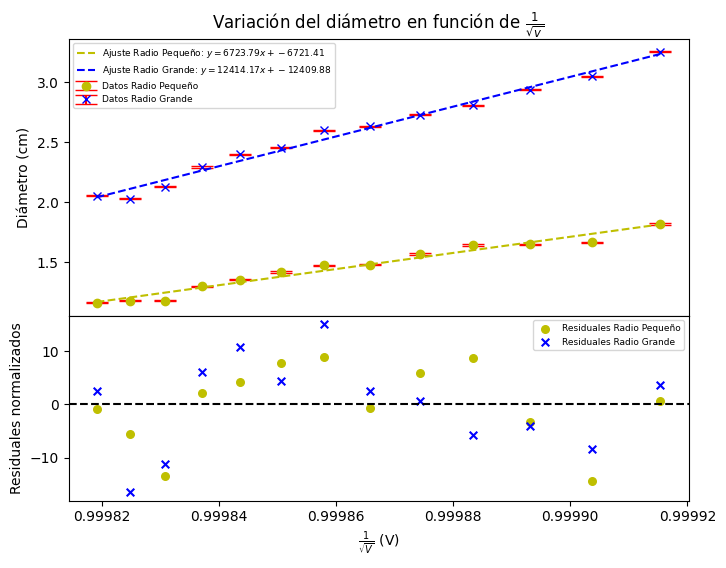

In [67]:
def fitting_function(x, m, b):
    return m * x  + b

V_prima = 1/np.sqrt(radio_pequeño["x"])
popt_p, pcov_p = curve_fit(fitting_function, V_prima, radio_pequeño["y"], sigma=radio_pequeño["error"]*2)
popt_g, pcov_g = curve_fit(fitting_function, V_prima, radio_grande["y"], sigma=radio_grande["error"]*2)

formula_text_p = r"$y = {:.2f}x + {:.2f}$".format(popt_p[0], popt_p[1])
formula_text_g = r"$y = {:.2f}x + {:.2f}$".format(popt_g[0], popt_g[1])

radio_pequeño["x"] = V_prima
radio_grande["x"] = V_prima
radio_pequeño["popt"]=popt_p
radio_pequeño["formula_text"] = formula_text_p
radio_grande["popt"]=popt_g
radio_grande["formula_text"]=formula_text_g

titulo = r"Variación del diámetro en función de $\frac{1}{\sqrt{v}}$"
cd.plot_fitted_curve(fitting_function, True, titulo ,dataset1= radio_pequeño, dataset2 = radio_grande)

Análisis de las cantidades (Ultima parte)

In [30]:
# Se conoce h

def distancia_interplanar (m):
    return (0.135*h) / (m*np.sqrt(2*m_e*e))

distancia_interplanar(3.48)

np.float64(4.757686974634083e-11)

In [46]:
# Se conocen d_i

def hallar_h (m,d):
    return (m*d*np.sqrt(2*m_e*e)) / (2*0.135)

def incer_hallar_h (m, d):
    incer_d = 0.01
    return np.sqrt((d*np.sqrt(2*m_e*e)/(2*0.135))**2 * incer_d**2)

a = hallar_h(2.29, 123.0e-12)
b = incer_hallar_h(2.29, 123.0e-12)

print(a, b)

5.636266487776576e-34 2.461251741387151e-36
